In [1]:
import pymysql

# Establish a connection to the MySQL database
host = 'den1.mysql6.gear.host'
user = 'situation'
password = 'cogni66.'
database = 'situation'

conn = pymysql.connect(host=host, user=user, password=password, database=database)
cursor = conn.cursor()

# Example: Selecting data from a table
cursor.execute('select * from lims_timeseries where fkey_limsDevice = 6')
rows = cursor.fetchall()

for row in rows:
    print(row)

cursor.close()
conn.close()


(58961, '6', datetime.datetime(2023, 7, 6, 9, 59, 54), '123|203|347|234|180|93')
(58962, '6', datetime.datetime(2023, 7, 6, 9, 59, 55), '173|249|207|167|144|209')
(58963, '6', datetime.datetime(2023, 7, 6, 9, 59, 56), '164|238|195|149|138|118')
(58964, '6', datetime.datetime(2023, 7, 6, 9, 59, 58), '141|233|218|152|140|117')
(58965, '6', datetime.datetime(2023, 7, 6, 9, 59, 59), '262|239|142|109|83|89')
(58966, '6', datetime.datetime(2023, 7, 6, 10, 0), '277|238|152|112|80|75')
(58967, '6', datetime.datetime(2023, 7, 6, 10, 0, 2), '245|247|134|105|94|93')
(58968, '6', datetime.datetime(2023, 7, 6, 10, 0, 3), '121|199|341|232|177|89')
(58969, '6', datetime.datetime(2023, 7, 6, 10, 0, 4), '120|199|341|232|178|89')
(58970, '6', datetime.datetime(2023, 7, 6, 10, 0, 6), '127|176|188|178|187|196')
(58971, '6', datetime.datetime(2023, 7, 6, 10, 0, 7), '117|149|159|169|219|182')
(58972, '6', datetime.datetime(2023, 7, 6, 10, 0, 8), '119|141|175|167|241|199')
(58973, '6', datetime.datetime(2023

In [2]:
import pandas as pd
import datetime

values = []
for row in rows:
    values.append([row[2].strftime('%H:%M:%S'),row[-1]])
    
df = pd.DataFrame(values, columns=['time', 'values'])

color_mapping = {
    0: 'violet',
    1: 'blue',
    2: 'green',
    3: 'yellow',
    4: 'orange',
    5: 'red'
}

# Splitting the 'values' column by the delimiter '|' and expanding into separate columns
split_values = df['values'].str.split('|', expand=True)

# Applying the color mapping to the column names
split_values.columns = [color_mapping[int(col)] for col in split_values.columns]

# Concatenating the original 'time' column with the split values DataFrame
result = pd.concat([df['time'], split_values], axis=1)
result['time'] = pd.to_datetime(result['time'])

print(result)



                   time violet blue green yellow orange  red
0   2023-07-06 09:59:54    123  203   347    234    180   93
1   2023-07-06 09:59:55    173  249   207    167    144  209
2   2023-07-06 09:59:56    164  238   195    149    138  118
3   2023-07-06 09:59:58    141  233   218    152    140  117
4   2023-07-06 09:59:59    262  239   142    109     83   89
..                  ...    ...  ...   ...    ...    ...  ...
689 2023-07-06 10:38:13    136  193   167    146    149   90
690 2023-07-06 10:38:14    135  190   166    146    147   89
691 2023-07-06 10:38:15    117  160   162    137    149   88
692 2023-07-06 10:38:17    120  162   167    142    153   92
693 2023-07-06 10:38:18    121  164   168    143    155   93

[694 rows x 7 columns]


/tmp/ipykernel_13658/2473059463.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  result['time'] = pd.to_datetime(result['time'])


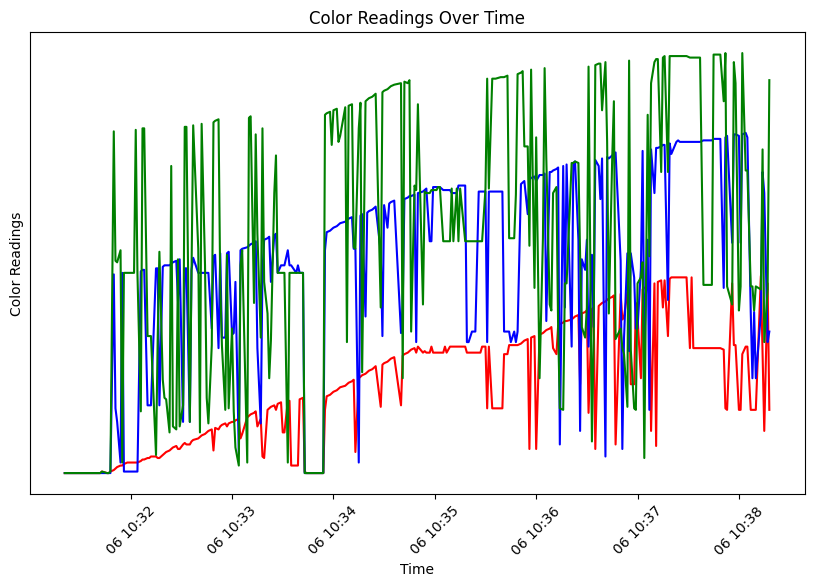

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Your existing code to create the 'result' DataFrame

color_mapping = {
    'violet': (148/255, 0, 211/255),  # RGB value for violet
    'blue': 'blue',
    'green': 'green',
    'yellow': 'yellow',
    'orange': 'orange',
    'red': 'red'
}

# Filter the columns to plot
columns_to_plot = ['red', 'blue', 'green']

# result = result[result['time'] >= pd.to_datetime('10:17:58')]

# Increase the size of the figure by approximately 20%
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the color readings over time with corresponding colors
lines = []
for column in columns_to_plot:
    if column in result[result['time'] >= pd.to_datetime('10:31:21')].columns:
        color = color_mapping[column]
        line, = ax.plot(result[result['time'] >= pd.to_datetime('10:31:21')]['time'], result[result['time'] >= pd.to_datetime('10:31:21')][column], color=color)
        lines.append(line)

# Adding labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Color Readings')
ax.set_title('Color Readings Over Time')

# Remove y-axis ticks
ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

# Angle x-axis ticks
plt.xticks(rotation=45)

# Create a legend
# ax.legend(lines, columns_to_plot, loc='upper right')

# Display the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Your existing code to create the 'result' DataFrame

color_mapping = {
    'violet': (148/255, 0, 211/255),  # RGB value for violet
    'blue': 'blue',
    'green': 'green',
    'yellow': 'yellow',
    'orange': 'orange',
    'red': 'red'
}

# Increase the size of the figure by approximately 20%
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the color readings over time with corresponding colors
lines = []
for column in result.columns[1:]:
    color = color_mapping[column]
    line, = ax.plot(result['time'], result[column], color=color)
    lines.append(line)

# Adding labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Color Readings')
ax.set_title('Color Readings Over Time')

# Remove y-axis ticks
ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

# Angle x-axis ticks
plt.xticks(rotation=45)

# Create a legend
# ax.legend(lines, result.columns[1:], loc='upper right')

# Display the plot
plt.show()
